## Importing Required Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# importing the dataset
df = pd.read_csv("Titanic.csv")

print(f"{df.shape[0]} rows and {df.shape[1]} columns imported")

891 rows and 12 columns imported


## Sneak peak into the data

In [3]:
# Sneak peek into the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploring Passenger Statistics

Total number of passengers on the ship are 891
Total number of male passengers on the ship are 577
Total number of female passengers on the ship are 314
Total number of passengers that survived 342
Total number of male passengers that survived are 109
Total number of female passengers that survived are 233


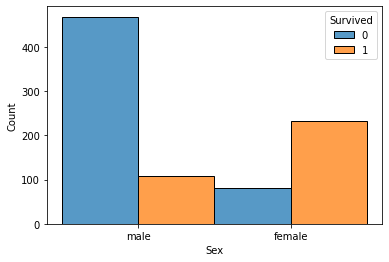

In [4]:
# Passenger Statistic Exploration
print(f"Total number of passengers on the ship are {df.PassengerId.max()}")
print(f"Total number of male passengers on the ship are {df.Sex.value_counts()[0]}")
print(f"Total number of female passengers on the ship are {df.Sex.value_counts()[1]}")
sns.histplot(data=df, x="Sex", hue="Survived", multiple="dodge")

# Survivor Exploration
print(f"Total number of passengers that survived {df.Survived.sum()}")
x = df[df.Sex == "male"].Survived.sum()
y = df[df.Sex == "female"].Survived.sum()
print(f"Total number of male passengers that survived are {x}")
print(f"Total number of female passengers that survived are {y}")

## Conclusion: Women were proritized in the evacuation process

In [5]:
# identifying null values in age
print(df.Age.isnull().sum())

# Demographic Age exploration
Male_avg = df[df.Sex == "male"]["Age"].mean()
print(f"Average age of a male passenger is {round(Male_avg,2)}")
Male_max = df[df.Sex == "male"]["Age"].max()
print(f"Maximum age of a male passenger is {round(Male_max,2)}")
Male_min = df[df.Sex == "male"]["Age"].min()
print(f"Minimum age of a male passenger is {round(Male_min,2)}")

# Demographic Age exploration
Female_avg = df[df.Sex == "female"]["Age"].mean()
print(f"Average age of a female passenger is {round(Female_avg,2)}")
Female_max = df[df.Sex == "female"]["Age"].max()
print(f"Maximum age of a female passenger is {round(Female_max,2)}")
Female_min = df[df.Sex == "female"]["Age"].min()
print(f"Minimum age of a female passenger is {round(Female_min,2)}")

# replacing null values with average male and female ages.
# df[df.Sex == 'male']['Age'].fillna(Male_avg, inplace = True)
# df[df.Sex == 'female']['Age'].fillna(Female_avg, inplace = True)

mask1 = df.Sex == "male"
mask2 = df.Sex == "female"
df.loc[mask1, "Age"] = df.loc[mask1, "Age"].fillna(Male_avg)
df.loc[mask2, "Age"] = df.loc[mask2, "Age"].fillna(Female_avg)

print(df.Age.isnull().sum())

177
Average age of a male passenger is 30.73
Maximum age of a male passenger is 80.0
Minimum age of a male passenger is 0.42
Average age of a female passenger is 27.92
Maximum age of a female passenger is 63.0
Minimum age of a female passenger is 0.75
0


<AxesSubplot:xlabel='Age', ylabel='Count'>

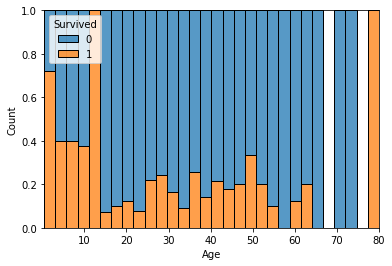

In [6]:
# Distribution of Age in Males
sns.histplot(
    data=df[df.Sex == "male"], x="Age", hue="Survived", bins=30, multiple="fill"
)

<AxesSubplot:xlabel='Age', ylabel='Count'>

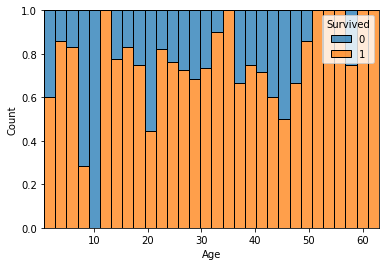

In [7]:
# Distribution of Age in Females
sns.histplot(
    data=df[df.Sex == "female"], x="Age", hue="Survived", multiple="fill", bins=30
)

## We can observe that children both male and female and older women were prioritized during 

<AxesSubplot:xlabel='Age', ylabel='Count'>

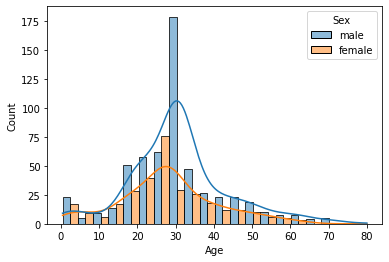

In [8]:
# Distribution of Passenger Population
sns.histplot(data=df, x="Age", hue="Sex", bins=20, multiple="dodge", kde=True)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

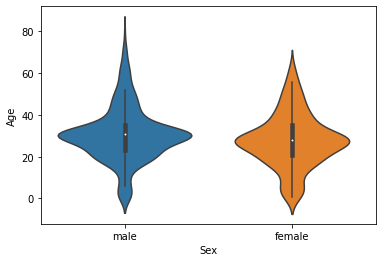

In [9]:
sns.violinplot(data=df, x="Sex", y="Age")

## Ticket Class Distribution

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

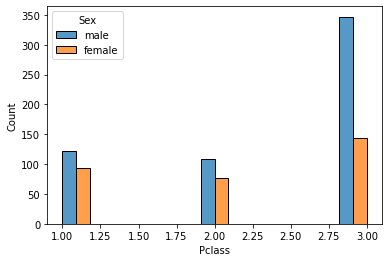

In [10]:
# Distribution of passengers in class
sns.histplot(data=df, x="Pclass", hue="Sex", multiple="dodge")

### Conclusion: Total lower class population is higher

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

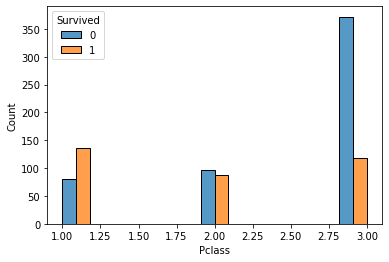

In [11]:
# Effect of Socio - Economic Status on the survival
sns.histplot(data=df, x="Pclass", hue="Survived", multiple="dodge")

### Conclusion: Higher class passengers were prioritized over lower class passengers in the evacuation process

### Passenger Distribution based on Port of Embarkation 

In [12]:
# Replacing null values with the mode of this column
df["Embarked"].fillna(df.Embarked.mode()[0], inplace=True)

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

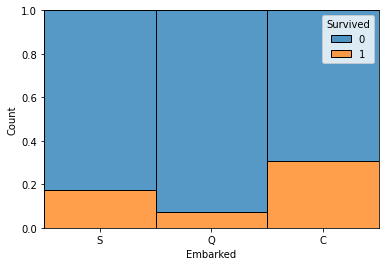

In [13]:
sns.histplot(data=df[df.Sex == "male"], x="Embarked", hue="Survived", multiple="fill")

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

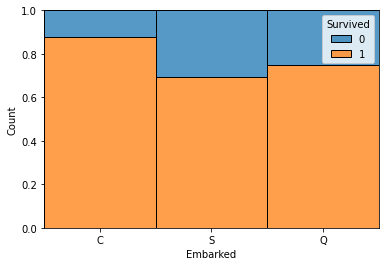

In [14]:
sns.histplot(data=df[df.Sex == "female"], x="Embarked", hue="Survived", multiple="fill")

### Passenger from Cherbourg are reall quick to escape ;)

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

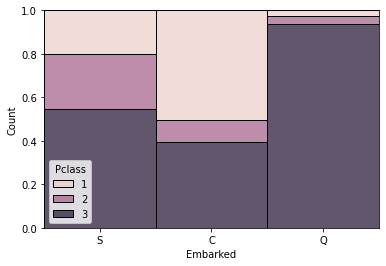

In [15]:
sns.histplot(data=df, x="Embarked", hue="Pclass", multiple="fill")

### This is because majority of the passengers embarking from the Cherbourg port are high-profile or First class passengers and were given priority

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

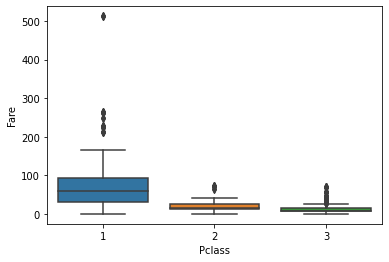

In [16]:
sns.boxplot(x=df.Pclass, y=df.Fare)